# Numpy 101

## Introduction
[Numpy](http://www.numpy.org/) is a popular open source library used for mathematical and scientific computing in Python. It enables efficient operations on large multi-dimensional arrays, and has a large ecosystem of supporting libraries:

* [Matplotlib](https://matplotlib.org/) for plotting and visualization
* [OpenCV](https://opencv.org/) for image and video processing
* [Pandas](https://pandas.pydata.org/) for file I/O and data analysis


To use Numpy, we first need to import the `numpy` package:

In [1]:
import numpy as np

Tab key for code completion, question mark `?` for document

In [2]:
# uncoment the following to test document with ?
# np.sin?

### Arrays

A numpy array is a grid of values, all of the same type, and is indexed by a tuple of nonnegative integers. The number of dimensions is the *rank* of the array; the *shape* of an array is a tuple of integers giving the size of the array along each dimension.

Numpy arrays can be generated from nested Python lists, and each element can be accessed with square brackets:

In [3]:
b = [1, 2, 3]
print(type(b))

<class 'list'>


In [4]:
a = np.array(b)  # Create a rank 1 array, or vector

In [5]:
print (type(a), a.shape, a[0], a[1], a[2])

<class 'numpy.ndarray'> (3,) 1 2 3


In [6]:
a[0] = 5                 # Change an element of the array
a                 

array([5, 2, 3])

In [7]:
b = np.array([[1,2,3],[4,5,6]])   # Create a rank 2 array, matrix
b

array([[1, 2, 3],
       [4, 5, 6]])

In [8]:
print(b.shape)                 
print(b[0, 0], b[0, 1], b[1, 0])

(2, 3)
1 2 4


Numpy arrays can also be created with some numpy functions:

In [9]:
a = np.zeros((3,2))  # Create an array of all zeros
print (a)

[[0. 0.]
 [0. 0.]
 [0. 0.]]


In [10]:
b = np.ones((3,2))   # Create an array of all ones
print (b)

[[1. 1.]
 [1. 1.]
 [1. 1.]]


In [11]:
c = np.full((2,2), 7) # Create a constant array
print (c) 

[[7 7]
 [7 7]]


In [12]:
d = np.eye(5)        # Create a 5x5 identity matrix
print (d)

[[1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]]


In [13]:
e = np.random.random((3,2)) # Create an array filled with random values
print (e)

[[0.10383363 0.43936434]
 [0.35453786 0.91903405]
 [0.79374826 0.57935492]]


### Array indexing

Numpy offers several ways to index into arrays.

**Slicing**: 
>Similar to Python lists, numpy arrays can be sliced. When you index into numpy arrays using slicing, the resulting array view will always be a subarray of the original array. Since arrays may be multidimensional, you must specify a slice for each dimension of the array.

In [14]:
import numpy as np

# Create the following rank 2 array with shape (3, 4)
# [[ 1  2  3  4]
#  [ 5  6  7  8]
#  [ 9 10 11 12]]
a = np.array([[1,2,3,4], [5,6,7,8], [9,10,11,12]])
a

array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12]])

In [15]:
# Use slicing to pull out the subarray consisting of the first 2 rows
# and columns 1 and 2; b is the following array of shape (2, 2):
# [[2 3]
#  [6 7]]
b = a[:2, 1:3]
print (b)

[[2 3]
 [6 7]]


A slice of an array is a view into the same data, so modifying it will modify the original array.

In [16]:
print (a[0, 1])

2


In [17]:
b[0, 0] = 77    # b[0, 0] is the same piece of data as a[0, 1]
print (a[0, 1]) 

77


Numbers `-5` to `255` are builtin shared objects, while other numbers are not the same object although they have the same values.

In [18]:
a = 10_000
b = 1
# the id of each object
id(a), id(b)

(139760116871632, 139760229138672)

In [19]:
# Note number has the same id as b, while 10000 are note the same as a
id(10_000), id(1)

(139760116872080, 139760229138672)

In [20]:
c = 10_000
print(type(c))
print(id(c))

<class 'int'>
139760116871152


You can also mix integer indexing with slice indexing. However, doing so will yield an array of lower rank than the original array. Note that this is quite different from the way that MATLAB handles array slicing:

In [21]:
# Create the following rank 2 array with shape (3, 4)
a = np.array([[1,2,3,4], [5,6,7,8], [9,10,11,12]])
print (a, a.shape)

[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]] (3, 4)


Two ways of accessing the data in the middle row of the array.
Mixing integer indexing with slices yields an array of lower rank,
while using only slices yields an array of the same rank as the
original array:

In [22]:
row_r1 = a[1, :]    # Rank 1 view of the second row of a  
row_r2 = a[1:2, :]  # Rank 2 view of the second row of a
row_r3 = a[[1], :]  # Rank 2 view of the second row of a
print (row_r1, row_r1.shape) 
print (row_r2, row_r2.shape)
print (row_r3, row_r3.shape)

[5 6 7 8] (4,)
[[5 6 7 8]] (1, 4)
[[5 6 7 8]] (1, 4)


In [23]:
# We can make the same distinction when accessing columns of an array:
col_r1 = a[:, 1]
col_r2 = a[:, 1:2]
print (col_r1, col_r1.shape)
print
print (col_r2, col_r2.shape)

[ 2  6 10] (3,)
[[ 2]
 [ 6]
 [10]] (3, 1)


**Integer array indexing**: 
> In contrast, integer array indexing allows you to construct arbitrary arrays using the data from another array.

In [24]:
a = np.array([[1,2], [3, 4], [5, 6]])
a

array([[1, 2],
       [3, 4],
       [5, 6]])

In [25]:
# An example of integer array indexing.
# The returned array will have shape (3,) and 
print (a[[0, 1, 2], [0, 1, 0]])

[1 4 5]


In [26]:
# The above example of integer array indexing is equivalent to this:
print (np.array([a[0, 0], a[1, 1], a[2, 0]]))

[1 4 5]


In [27]:
# When using integer array indexing, you can reuse the same
# element from the source array:
print (a[[0, 0], [1, 1]])

# Equivalent to the previous integer array indexing example
print (np.array([a[0, 1], a[0, 1]]))

[2 2]
[2 2]


One useful trick with integer array indexing is selecting or mutating one element from each row of a matrix:

In [28]:
# Create a new array from which we will select elements
a = np.array([[1,2,3], [4,5,6], [7,8,9], [10, 11, 12]])
print (a)

[[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]


In [29]:
# Create an array of indices
b = np.array([0, 2, 0, 1])

# Select one element from each row of a using the indices in b
print (a[np.arange(4), b])  # Prints "[ 1  6  7 11]"

[ 1  6  7 11]


In [30]:
# Mutate one element from each row of a using the indices in b
a[np.arange(4), b] += 10
print (a)

[[11  2  3]
 [ 4  5 16]
 [17  8  9]
 [10 21 12]]


**Boolean array indexing**:
> Boolean array indexing lets you pick out arbitrary elements of an array. Frequently this type of indexing is used to select the elements of an array that satisfy some condition.

In [31]:
import numpy as np

a = np.array([[1,2], [3, 4], [5, 6]])

bool_idx = (a > 2)  # Find the elements of a that are bigger than 2;
                    # this returns a numpy array of Booleans of the same
                    # shape as a, where each slot of bool_idx tells
                    # whether that element of a is > 2.

print (bool_idx)

[[False False]
 [ True  True]
 [ True  True]]


In [32]:
# We use boolean array indexing to construct a rank 1 array
# consisting of the elements of a corresponding to the True values
# of bool_id
b = a[bool_idx]
b

array([3, 4, 5, 6])

In [33]:
# We do all of the above in a single concise statement:
print (a[a > 2])

[3 4 5 6]


For brevity we have left out a lot of details about numpy array indexing; if you want to know more you should read the documentation.

### Datatypes

Every numpy array is a grid of elements of the same type. Numpy provides a large set of numeric datatypes that you can use to construct arrays. Numpy tries to guess a datatype when you create an array, but functions that construct arrays usually also include an optional argument to explicitly specify the datatype. Here is an example:

In [34]:
x = np.array([1, 2])  # Let numpy choose the datatype
y = np.array([1.0, 2.0])  # Let numpy choose the datatype
z = np.array([1, 2], dtype=np.int64)  # Force a particular datatype

print (x.dtype, y.dtype, z.dtype)

int64 float64 int64


You can read all about numpy datatypes in the [documentation](http://docs.scipy.org/doc/numpy/reference/arrays.dtypes.html).

### Array math

Basic mathematical functions operate elementwise on arrays, and are available both as operator overloads and as functions in the numpy module:

In [35]:
x = np.array([[1,2],[3,4]], dtype=np.float64)
y = np.array([[5,6],[7,8]], dtype=np.float64)

# Elementwise sum; both produce the array
print (x + y)
print (np.add(x, y))

[[ 6.  8.]
 [10. 12.]]
[[ 6.  8.]
 [10. 12.]]


In [36]:
# Elementwise difference; both produce the array
print (x - y)
print (np.subtract(x, y))

[[-4. -4.]
 [-4. -4.]]
[[-4. -4.]
 [-4. -4.]]


In [37]:
# Elementwise product; both produce the array
print (x * y)
print (np.multiply(x, y))

[[ 5. 12.]
 [21. 32.]]
[[ 5. 12.]
 [21. 32.]]


In [38]:
# Elementwise division; both produce the array
# [[ 0.2         0.33333333]
#  [ 0.42857143  0.5       ]]
print (x / y)
print (np.divide(x, y))

[[0.2        0.33333333]
 [0.42857143 0.5       ]]
[[0.2        0.33333333]
 [0.42857143 0.5       ]]


In [39]:
# Elementwise square root; produces the array
# [[ 1.          1.41421356]
#  [ 1.73205081  2.        ]]
print (np.sqrt(x))

[[1.         1.41421356]
 [1.73205081 2.        ]]


Note that here `*` is elementwise multiplication, not matrix multiplication. We instead use the `dot` function to compute inner products of vectors, to multiply a vector by a matrix, and to multiply matrices. `dot` is available both as a function in the numpy module and as an instance method of array objects:

In [40]:
x = np.array([[1,2],[3,4]])
y = np.array([[5,6],[7,8]])

v = np.array([9,10])
w = np.array([11, 12])

# Inner product of vectors; both produce 219
print (v.dot(w))
print (np.dot(v, w))

219
219


In [41]:
# Matrix / vector product; both produce the rank 1 array [29 67]
print (x.dot(v))
print (np.dot(x, v))

[29 67]
[29 67]


In [42]:
# Matrix / matrix product; both produce the rank 2 array
# [[19 22]
#  [43 50]]
print (x.dot(y))
print (np.dot(x, y))

[[19 22]
 [43 50]]
[[19 22]
 [43 50]]


Numpy provides many useful functions for performing computations on arrays; one of the most useful is `sum`:

In [43]:
x = np.array([[1,2],[3,4]])

print (np.sum(x))  # Compute sum of all elements; prints "10"
print (np.sum(x, axis=0))  # Compute sum of each column; prints "[4 6]"
print (np.sum(x, axis=1))  # Compute sum of each row; prints "[3 7]"

10
[4 6]
[3 7]


You can find the full list of mathematical functions provided by numpy in the [documentation](http://docs.scipy.org/doc/numpy/reference/routines.math.html).

Apart from computing mathematical functions using arrays, we frequently need to reshape or otherwise manipulate data in arrays. The simplest example of this type of operation is transposing a matrix; to transpose a matrix, simply use the `T` attribute of an array object:

In [44]:
print (x)

[[1 2]
 [3 4]]


In [45]:
y = x.T
y[0, 1] = 500
x.shape, y.shape

((2, 2), (2, 2))

In [46]:
v = np.array([[1,2,3]])
print (v) 
print (v.T)

[[1 2 3]]
[[1]
 [2]
 [3]]


In [47]:
v = np.array([1, 2, 3, 4, 5, 6])
v, v.shape

(array([1, 2, 3, 4, 5, 6]), (6,))

In [48]:
v1 = v.reshape(2, 3)
v1, v1.shape

(array([[1, 2, 3],
        [4, 5, 6]]),
 (2, 3))

### Broadcasting

Broadcasting is a powerful mechanism that allows numpy to work with arrays of different shapes when performing arithmetic operations. Frequently we have a smaller array and a larger array, and we want to use the smaller array multiple times to perform some operation on the larger array.

For example, suppose that we want to add a constant vector to each row of a matrix. We could do it like this:

In [49]:
# We will add the vector v to each row of the matrix x,
# storing the result in the matrix y
x = np.array([[1,2,3], [4,5,6], [7,8,9], [10, 11, 12]])
v = np.array([1, 0, 1])
y = np.empty_like(x)   # Create an empty matrix with the same shape as x

# Add the vector v to each row of the matrix x with an explicit loop
for i in range(4):
    y[i, :] = x[i, :] + v

print (y)

[[ 2  2  4]
 [ 5  5  7]
 [ 8  8 10]
 [11 11 13]]


This works; however when the matrix `x` is very large, computing an explicit loop in Python could be slow. Note that adding the vector v to each row of the matrix `x` is equivalent to forming a matrix `vv` by stacking multiple copies of `v` vertically, then performing elementwise summation of `x` and `vv`. We could implement this approach like this:

In [50]:
vv = np.tile(v, (4, 1))  # Stack 4 copies of v on top of each other
print (vv)                 # Prints "[[1 0 1]
                         #          [1 0 1]
                         #          [1 0 1]
                         #          [1 0 1]]"

[[1 0 1]
 [1 0 1]
 [1 0 1]
 [1 0 1]]


In [51]:
y = x + vv  # Add x and vv elementwise
print (y)

[[ 2  2  4]
 [ 5  5  7]
 [ 8  8 10]
 [11 11 13]]


Numpy broadcasting allows us to perform this computation without actually creating multiple copies of `v`. Consider this version, using broadcasting:

In [52]:
import numpy as np

# We will add the vector v to each row of the matrix x,
# storing the result in the matrix y
x = np.array([[1,2,3], [4,5,6], [7,8,9], [10, 11, 12]])
v = np.array([1, 0, 1])
y = x + v  # Add v to each row of x using broadcasting
print (y)

[[ 2  2  4]
 [ 5  5  7]
 [ 8  8 10]
 [11 11 13]]


The line `y = x + v` works even though `x` has shape `(4, 3)` and `v` has shape `(3,)` because of broadcasting; this line works as if `v` actually had shape `(4, 3)`, where each row was a copy of `v`, and the sum was performed elementwise.

Broadcasting two arrays together follows these rules:

1. If the arrays do not have the same rank, prepend the shape of the lower rank array with 1s until both shapes have the same length.
2. The two arrays are said to be compatible in a dimension if they have the same size in the dimension, or if one of the arrays has size 1 in that dimension.
3. The arrays can be broadcast together if they are compatible in all dimensions.
4. After broadcasting, each array behaves as if it had shape equal to the elementwise maximum of shapes of the two input arrays.
5. In any dimension where one array had size 1 and the other array had size greater than 1, the first array behaves as if it were copied along that dimension

If this explanation does not make sense, try reading the explanation from the [documentation](http://docs.scipy.org/doc/numpy/user/basics.broadcasting.html) or this [explanation](http://wiki.scipy.org/EricsBroadcastingDoc).

Broadcasting typically makes your code more concise and faster, so you should strive to use it where possible. Functions that support broadcasting are known as `ufunc`, i.e.,  `universal functions`. You can find the list of all universal functions in the [documentation](http://docs.scipy.org/doc/numpy/reference/ufuncs.html#available-ufuncs).

Here are some applications of broadcasting:

In [53]:
# Compute outer product of vectors
v = np.array([1,2,3])  # v has shape (3,)
w = np.array([4,5])    # w has shape (2,)
# To compute an outer product, we first reshape v to be a column
# vector of shape (3, 1); we can then broadcast it against w to yield
# an output of shape (3, 2), which is the outer product of v and w:

print (np.reshape(v, (3, 1)) * w)

[[ 4  5]
 [ 8 10]
 [12 15]]


In [54]:
# Add a vector to each row of a matrix
x = np.array([[1,2,3], [4,5,6]])
# x has shape (2, 3) and v has shape (3,) so they broadcast to (2, 3),
# giving the following matrix:

print (x + v)

[[2 4 6]
 [5 7 9]]


In [55]:
# Add a vector to each column of a matrix
# x has shape (2, 3) and w has shape (2,).
# If we transpose x then it has shape (3, 2) and can be broadcast
# against w to yield a result of shape (3, 2); transposing this result
# yields the final result of shape (2, 3) which is the matrix x with
# the vector w added to each column. Gives the following matrix:

print ((x.T + w).T)

[[ 5  6  7]
 [ 9 10 11]]


In [56]:
# Another solution is to reshape w to be a row vector of shape (2, 1);
# we can then broadcast it directly against x to produce the same
# output.
print (x + np.reshape(w, (2, 1)))

[[ 5  6  7]
 [ 9 10 11]]


In [57]:
# Multiply a matrix by a constant:
# x has shape (2, 3). Numpy treats scalars as arrays of shape ();
# these can be broadcast together to shape (2, 3), producing the
# following array:
print (x * 2)

[[ 2  4  6]
 [ 8 10 12]]


This brief overview has touched on many of the important things that you need to know about numpy, but is far from complete. Check out the [numpy reference](http://docs.scipy.org/doc/numpy/reference/) to find out much more about numpy.

## Matplotlib

Matplotlib is a plotting library. In this section give a brief introduction to the `matplotlib.pyplot` module, which provides a plotting system similar to that of MATLAB.

In [58]:
import matplotlib.pyplot as plt

By running this special iPython command, we will be displaying plots inline:

In [59]:
%matplotlib inline

### Plotting

One of the most important function in `matplotlib` is `plot`, which allows you to plot 2D data. Here is a simple example:

In [60]:
# Compute the x and y coordinates for points on a sine curve
x = np.arange(0, 3 * np.pi, 0.1)
x

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
       1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5,
       2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8,
       3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1,
       5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4,
       6.5, 6.6, 6.7, 6.8, 6.9, 7. , 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7,
       7.8, 7.9, 8. , 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9. ,
       9.1, 9.2, 9.3, 9.4])

In [61]:
y = np.sin(x)
y

array([ 0.        ,  0.09983342,  0.19866933,  0.29552021,  0.38941834,
        0.47942554,  0.56464247,  0.64421769,  0.71735609,  0.78332691,
        0.84147098,  0.89120736,  0.93203909,  0.96355819,  0.98544973,
        0.99749499,  0.9995736 ,  0.99166481,  0.97384763,  0.94630009,
        0.90929743,  0.86320937,  0.8084964 ,  0.74570521,  0.67546318,
        0.59847214,  0.51550137,  0.42737988,  0.33498815,  0.23924933,
        0.14112001,  0.04158066, -0.05837414, -0.15774569, -0.2555411 ,
       -0.35078323, -0.44252044, -0.52983614, -0.61185789, -0.68776616,
       -0.7568025 , -0.81827711, -0.87157577, -0.91616594, -0.95160207,
       -0.97753012, -0.993691  , -0.99992326, -0.99616461, -0.98245261,
       -0.95892427, -0.92581468, -0.88345466, -0.83226744, -0.77276449,
       -0.70554033, -0.63126664, -0.55068554, -0.46460218, -0.37387666,
       -0.2794155 , -0.1821625 , -0.0830894 ,  0.0168139 ,  0.1165492 ,
        0.21511999,  0.31154136,  0.40484992,  0.49411335,  0.57

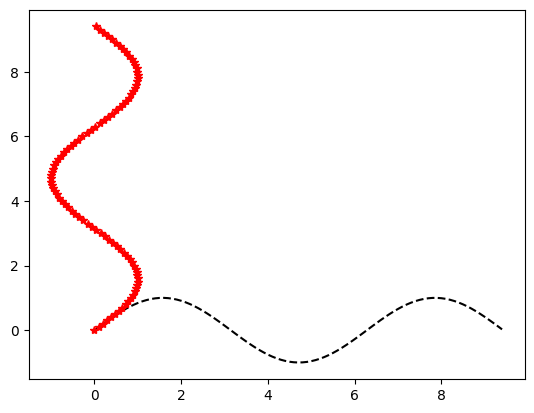

In [62]:
# Plot the points using matplotlib
plt.plot(x, y, 'k--')
plt.plot(y, x, 'r*')

With just a little bit of extra work we can easily plot multiple lines at once, and add a title, legend, and axis labels:

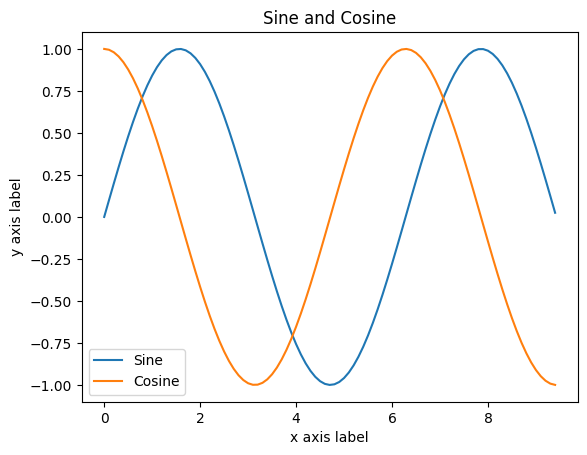

In [63]:
y_sin = np.sin(x)
y_cos = np.cos(x)

# Plot the points using matplotlib
plt.plot(x, y_sin)
plt.plot(x, y_cos)
plt.xlabel('x axis label')
plt.ylabel('y axis label')
plt.title('Sine and Cosine')
# 
plt.legend(['Sine', 'Cosine'])

### Subplots 

You can plot different things in the same figure using the subplot function. Here is an example:

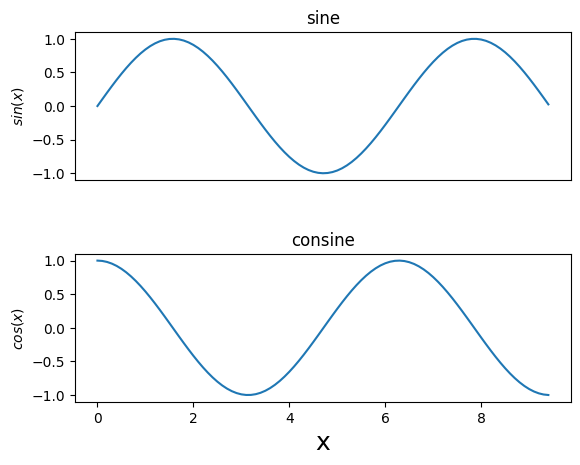

In [64]:
# Compute the x and y coordinates for points on sine and cosine curves
x = np.arange(0, 3 * np.pi, 0.1)
y_sin = np.sin(x)
y_cos = np.cos(x)

# Set up a subplot grid that has height 2 and width 1,
# and set the first such subplot as active.
plt.subplot(2, 1, 1)
# Make the first plot
plt.plot(x, y_sin)
plt.xticks([])      # turn off xticks
plt.ylabel('$sin(x)$')
plt.title('sine')

# Set the second subplot as active, and make the second plot.
plt.subplot(2, 1, 2)
plt.plot(x, y_cos)
plt.xlabel('x', fontsize='18')
plt.ylabel('$cos(x)$')
plt.title('consine')

# adjust space (height)
plt.subplots_adjust(hspace=.5)

# # Show the figure.
# plt.show()   # not necessary if %matplotlib inline is set

You can read much more about the `subplot` function in the [documentation](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.subplot).